## CIA 1

### Program1

In [14]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#### Loading the dataset

In [15]:
# Load Dataset
df = pd.read_csv("SET-2-Program-1-simple linear regression.csv")

#### Handling missing values

In [20]:
# Check number of missing values before handling
print("Missing values before handling:")
print(df.isnull().sum())

# Count total missing values
total_missing = df.isnull().sum().sum()
print(f"\nTotal number of missing values: {total_missing}")

# Handle missing values using mean imputation for numeric columns
df.fillna(df.mean(numeric_only=True), inplace=True)

# Verify missing values are handled
print("\nMissing values after handling:")
print(df.isnull().sum())


Missing values before handling:
Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

Total number of missing values: 0

Missing values after handling:
Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(

#### Train - Test split

In [21]:
# Define features to use for prediction
features = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 
            'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)']

# Create feature matrix X and target vector y
X = df[features]
y = df['CO2 Emissions(g/km)']

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes to understand the split
print("Training set shape:")
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print("\nTest set shape:")
print(f"X_test: {X_test.shape}") 
print(f"y_test: {y_test.shape}")

# Print first few rows of training data
print("\nFirst few rows of training features:")
print(X_train.head())
print("\nFirst few values of training target:")
print(y_train.head())


Training set shape:
X_train: (5908, 5)
y_train: (5908,)

Test set shape:
X_test: (1477, 5)
y_test: (1477,)

First few rows of training features:
      Engine Size(L)  Cylinders  Fuel Consumption City (L/100 km)  \
6590             3.0          6                              11.4   
6274             4.0          6                              14.7   
2251             3.0          6                              13.8   
3149             3.4          6                              11.3   
4362             2.0          4                              10.1   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  
6590                              8.1                               9.9  
6274                             10.3                              12.7  
2251                              9.0                              11.7  
3149                              7.9                               9.8  
4362                              7.0                               8.

In [18]:
# -------------------------------
# 3. Simple Linear Regression (Single Feature)
# -------------------------------
lr_simple = LinearRegression()
lr_simple.fit(X_train[['Engine Size(L)']], y_train)
y_pred_simple = lr_simple.predict(X_test[['Engine Size(L)']])

print("Simple Linear Regression - Engine Size only")
print("R² Score:", r2_score(y_test, y_pred_simple))
print("MSE:", mean_squared_error(y_test, y_pred_simple))

Simple Linear Regression - Engine Size only
R² Score: 0.723802284239314
MSE: 950.0172349620058


In [23]:
#-------------------------------
# 4. Influence of Multiple Variables (OLS)
# -------------------------------
import statsmodels.api as sm

X_train_const = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_train_const).fit()
print(ols_model.summary())

ImportError: cannot import name '_lazywhere' from 'scipy._lib._util' (/Users/mohsin/MCA/Exam/AIML/venv/lib/python3.13/site-packages/scipy/_lib/_util.py)

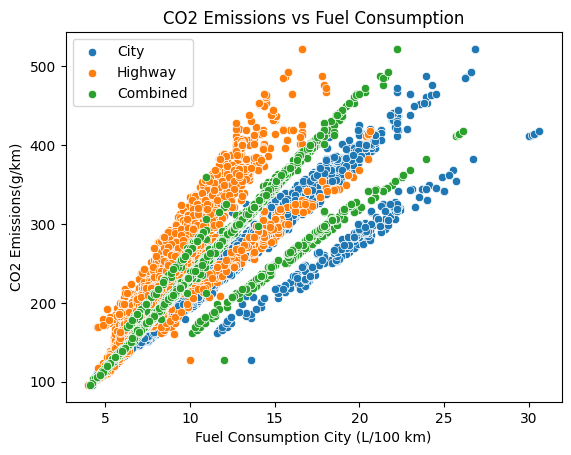

In [24]:

# -------------------------------
# 6. Compare City, Highway, and Combined Fuel Consumption
# -------------------------------
sns.scatterplot(x='Fuel Consumption City (L/100 km)', y='CO2 Emissions(g/km)', data=df, label='City')
sns.scatterplot(x='Fuel Consumption Hwy (L/100 km)', y='CO2 Emissions(g/km)', data=df, label='Highway')
sns.scatterplot(x='Fuel Consumption Comb (L/100 km)', y='CO2 Emissions(g/km)', data=df, label='Combined')
plt.title("CO2 Emissions vs Fuel Consumption")
plt.legend()
plt.show()



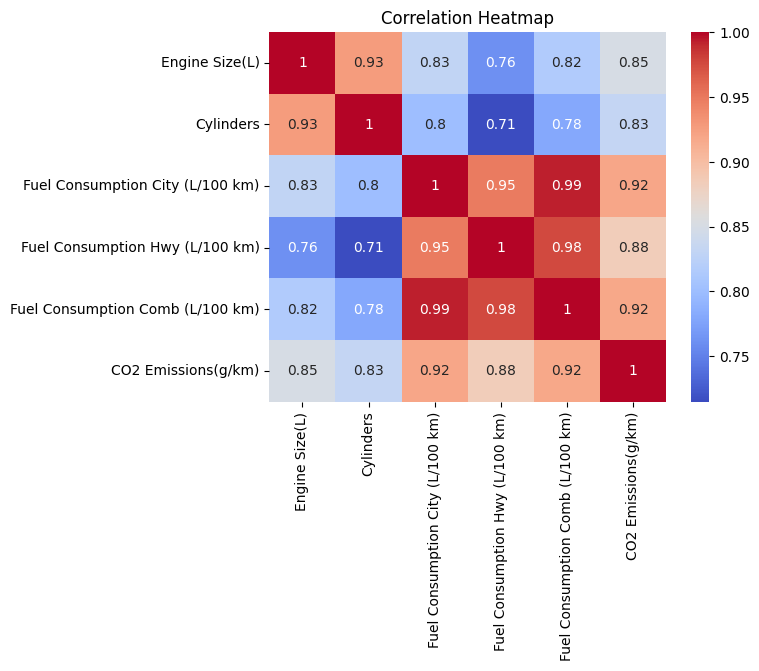

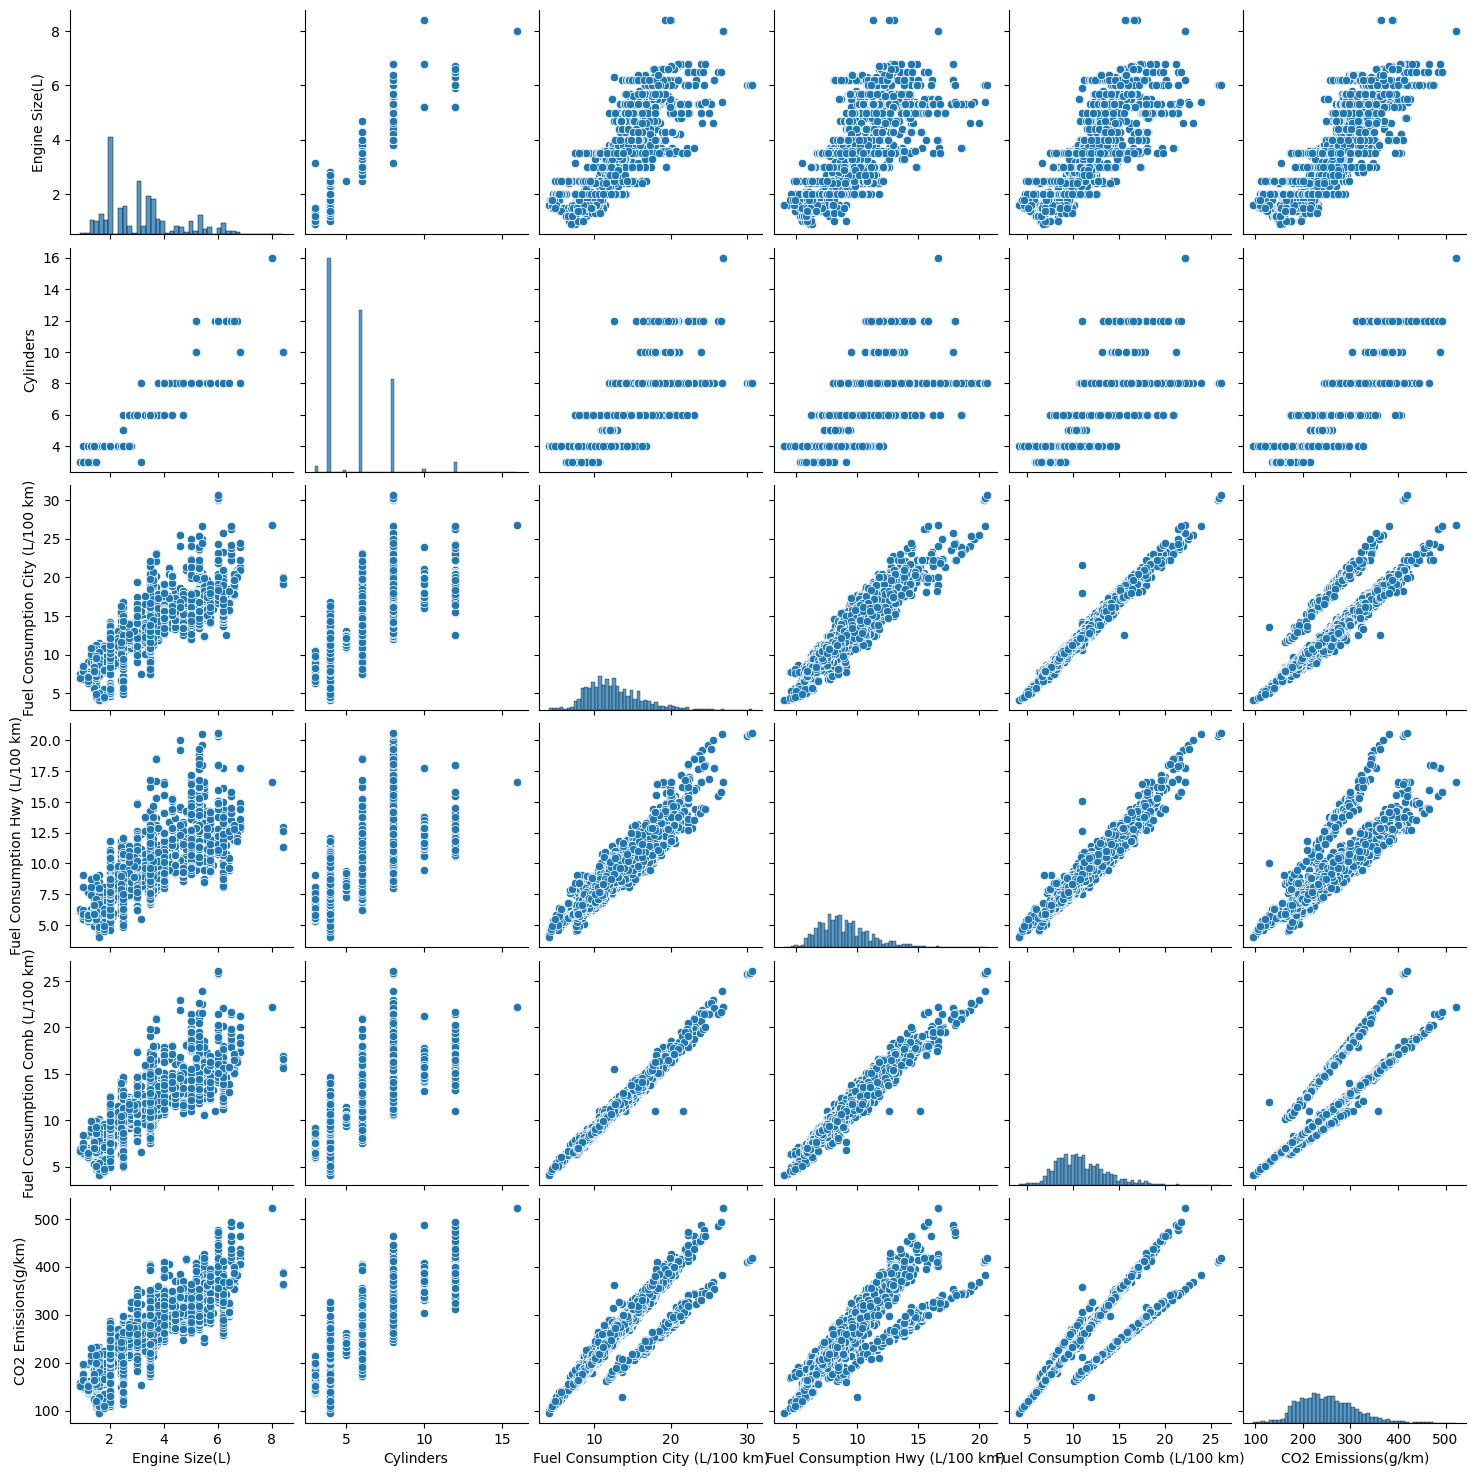

In [25]:
# -------------------------------
# 7. Visualizations
# -------------------------------
sns.heatmap(df[features + ['CO2 Emissions(g/km)']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

sns.pairplot(df[features + ['CO2 Emissions(g/km)']])
plt.show()